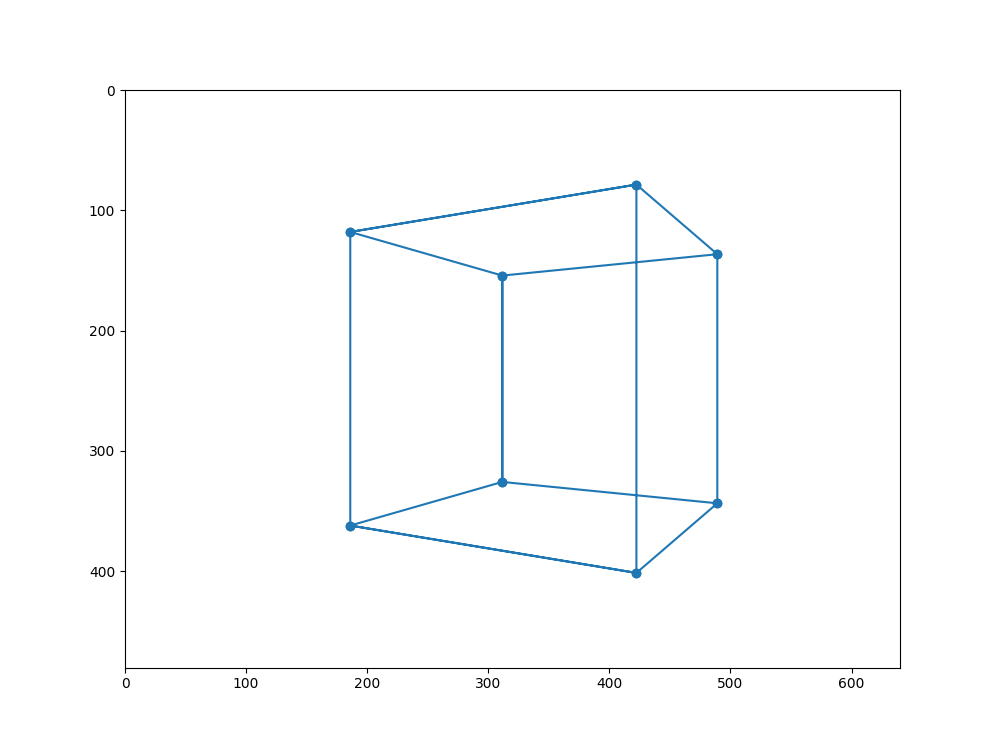

In [1]:
import numpy as np
%matplotlib ipympl
from matplotlib import pyplot as plt

x = [1, -1, -1,  1, 1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1]
y = [1,  1, -1, -1, 1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1]
z = [1,  1,  1,  1, 1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1]

Xcube = np.array([x, y, z, [1]*16])

dX=0
dY=30
dZ=0

rotX = np.array([[1,0,0],
                 [0,np.cos(np.deg2rad(dX)),-np.sin(np.deg2rad(dX))],
                 [0,np.sin(np.deg2rad(dX)),np.cos(np.deg2rad(dX))]])
rotY = np.array([[np.cos(np.deg2rad(dY)),0,np.sin(np.deg2rad(dY))],
                 [0,1,0],
                 [-np.sin(np.deg2rad(dY)),0,np.cos(np.deg2rad(dY))]])
rotZ = np.array([[np.cos(np.deg2rad(dZ)),-np.sin(np.deg2rad(dZ)),0],
                 [np.sin(np.deg2rad(dZ)),np.cos(np.deg2rad(dZ)),0],
                 [0,0,1]])

R = rotX @ rotY @ rotZ

C = np.array([[2],[0],[-4]])

RC = R @ C

ExParam = np.hstack((R,-RC))
ExParam = np.vstack((ExParam,[0,0,0,1]))
#print(R)
#print(RC)
#print(ExParam)

f = 500
m = 1
px = 320
py = 240
InParam = np.array([[m*f,0,px,0],
                   [0,-m*f,py,0],
                   [0,0,1,0]])

res = (InParam @ ExParam) @ Xcube

#print("res")
#print(res)


xi = res[0, :]/res[2, :]  
yi = res[1, :]/res[2, :]
# xi = res[0, :]  
# yi = res[1, :]

factor = 2.5
plt.figure(figsize=(4*factor, 3*factor))  # taille de l'image en pouces
plt.axis([0, 640, 480, 0])
plt.plot(xi,yi, "-o")  # "-o" pour traits et cercle
plt.show()

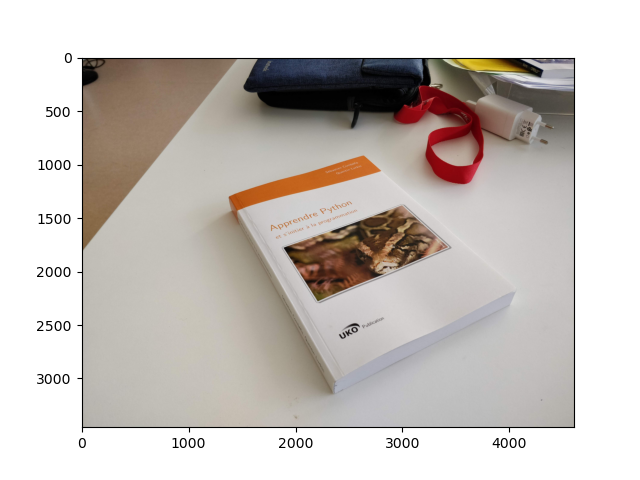

In [2]:
import numpy as np
%matplotlib ipympl
from matplotlib import pyplot as plt

# import to load images
import matplotlib.image as mpimg

# image loading
img = mpimg.imread('cover.jpg')

fig = plt.figure()
points = [[], []]

# function to be called on each click on the image
def onclick(event):
    # save the point
    points[0].append(event.xdata)
    points[1].append(event.ydata)
    # show a cross
    plt.plot([event.xdata], [event.ydata], "x")

# register the click listener
fig.canvas.mpl_connect('button_press_event', onclick)

# display the image
plt.imshow(img)
plt.show()

(8, 8)
[[ 3.79127837e+00]
 [ 2.49820797e-01]
 [ 1.37004221e+03]
 [-6.55803263e-01]
 [ 1.06627311e+00]
 [ 1.29932792e+03]
 [ 3.08031626e-04]
 [-6.09391045e-04]
 [ 1.00000000e+00]]
[[ 3.79127837e+00  2.49820797e-01  1.37004221e+03]
 [-6.55803263e-01  1.06627311e+00  1.29932792e+03]
 [ 3.08031626e-04 -6.09391045e-04  1.00000000e+00]]
(3456, 4608, 3)
0.208
0.204
196
193


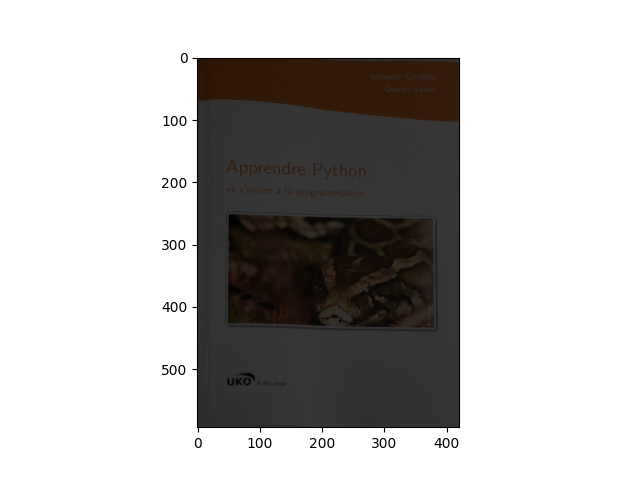

In [14]:
import numpy as np
%matplotlib ipympl
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
#print(points)
points = [[1370.0422077922083, 2623.0292207792218, 4053.6785714285725, 2379.9123376623384], [1299.3279220779218, 906.6006493506488, 2159.587662337662, 3029.198051948052]]
xi = np.array(points[0])
yi = np.array(points[1])
#print(xi)
#print(yi)

size_y = 594
size_x = 420

img = mpimg.imread('cover.jpg')
    
#print(Collumn_Image)

xw = np.array([0,size_x,size_x,0])
yw = np.array([0,0,size_y,size_y])

Collumn_Image = np.array([[xi[0]],[yi[0]],[xi[1]],[yi[1]],[xi[2]],[yi[2]],[xi[3]],[yi[3]]])

# xi,xw = xw,xi
# yi,yw = yw,yi


x1w,x2w,x3w,x4w = xw[0],xw[1],xw[2], xw[3]
y1w,y2w,y3w,y4w = yw[0],yw[1],yw[2], yw[3]

x1i,x2i,x3i,x4i = xi[0],xi[1],xi[2], xi[3]
y1i,y2i,y3i,y4i = yi[0],yi[1],yi[2], yi[3]



big = np.array([x1w,y1w,1,0,0,0,-x1i*x1w,-x1i*y1w])
big = np.vstack((big,np.array([0,0,0,x1w,y1w,1,-y1i*x1w,-y1i*y1w])))
big = np.vstack((big,np.array([x2w,y2w,1,0,0,0,-x2i*x2w,-x2i*y2w])))
big = np.vstack((big,np.array([0,0,0,x2w,y2w,1,-y2i*x2w,-y2i*y2w])))
big = np.vstack((big,np.array([x3w,y3w,1,0,0,0,-x3i*x3w,-x3i*y3w])))
big = np.vstack((big,np.array([0,0,0,x3w,y3w,1,-y3i*x3w,-y3i*y3w])))
big = np.vstack((big,np.array([x4w,y4w,1,0,0,0,-x4i*x4w,-x4i*y4w])))
big = np.vstack((big,np.array([0,0,0,x4w,y4w,1,-y4i*x4w,-y4i*y4w])))
# print(big)





# big = np.array([[xw[0]],[0],[xw[1]],[0],[xw[2]],[0],[xw[3]],[0]])
# big = np.hstack((big,np.array([[yw[0]],[0],[yw[1]],[0],[yw[2]],[0],[yw[3]],[0]])))
# big = np.hstack((big,np.array([[1],[0],[1],[0],[1],[0],[1],[0]])))
# big = np.hstack((big,np.array([[0],[xw[0]],[0],[xw[1]],[0],[xw[2]],[0],[xw[3]]])))
# big = np.hstack((big,np.array([[0],[yw[0]],[0],[yw[1]],[0],[yw[2]],[0],[yw[3]]])))
# big = np.hstack((big,np.array([[0],[1],[0],[1],[0],[1],[0],[1]])))
# big = np.hstack((big,np.array([[-xi[0]*xw[0]],[-yi[0]*xw[0]],[-xi[1]*xw[1]],[-yi[1]*xw[1]],[-xi[2]*xw[2]],[-yi[2]*xw[2]],[-xi[3]*xw[3]],[-yi[3]*xw[3]]])))
# big = np.hstack((big,np.array([[-xi[0]*yw[0]],[-yi[0]*yw[0]],[-xi[1]*yw[1]],[-yi[1]*yw[1]],[-xi[2]*yw[2]],[-yi[2]*yw[2]],[-xi[3]*yw[3]],[-yi[3]*yw[3]]])))

print(np.shape(big))

big = np.linalg.inv(big)

m = big @ Collumn_Image
m = np.vstack((m,np.array([1])))
print(m)
proj = np.reshape(m,(3,3))
print(proj)

# fig = plt.figure()
# img = mpimg.imread('cover.jpg')
# plt.imshow(img)
# plt.show()

img_array = np.asarray(img)
#img_array = np.transpose(img_array)
print(np.shape(img_array))

#new_img = np.ones_like(img_array)
new_img = np.ones((size_y,size_x,3))
#print(new_img)

for i in range(size_x):
    for j in range(size_y):
        #if j == 150 and i >= 160:
            #print(f"res : {res}")
        res = proj @ (np.array([[i],[j],[1]]))
        temp = img_array[np.round(res[1,0]/res[2,0]).astype(int),np.round(res[0,0]/res[2,0]).astype(int)]
        new_img[j,i] = np.array([int(temp[0])/1000,int(temp[1])/1000,int(temp[2])/1000])

        
print(new_img[100,100,0])
print(new_img[100,100][1])
print(img_array[1000,1000][0])
print(img_array[1000,1000][1])
fig = plt.figure()
plt.imshow(new_img)
plt.show()